# Life Cycle Labor Supply

## Setup

In [154]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Consumption-Saving Model

In [155]:
# load local model file and initialize model class
from DynLaborModel import *
model = UIEmploymentModelClass()

par = model.par
sol = model.sol
sim = model.sim

model.setup()
model.allocate()

In [156]:
model.solve()

In [157]:
model.simulate()

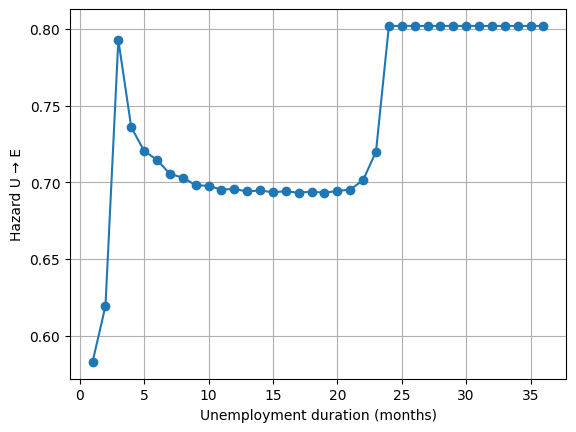

In [160]:
# aggregate employment path
emp_rate = model.sim.muE.sum(axis=(1,2,3))
unemp_rate = model.sim.muU.sum(axis=(1,2,3))

# hazard for cohort entering at t0=0, durations up to 60
hz = model.hazard_from_entry_time(t0=0)

# take first 36 durations
hz36 = hz.iloc[:36]

plt.figure()
plt.plot(hz36["duration"], hz36["hazard"], marker="o")
plt.xlabel("Unemployment duration (months)")
plt.ylabel("Hazard U → E")
# plt.title("Discrete-time hazard from UI to employment")
plt.grid(True)
plt.show()